In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,plot_confusion_matrix, roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

In [2]:
df = pd.read_csv('Pokemon.csv')

In [3]:
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [4]:
df.tail()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True
1071,898,Shadow Rider Calyrex,Psychic,Ghost,680,100,85,80,165,100,150,8,True


In [5]:
df.shape

(1072, 13)

In [6]:
df.describe(include='all')

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
count,1072.000000,1072,1072,574,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072
unique,NaN,1072,20,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Lugia,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,136,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,954
mean,445.219216,NaN,NaN,NaN,440.885261,70.486940,80.938433,74.968284,73.273321,72.476679,68.792910,4.294776,NaN
std,267.772806,NaN,NaN,NaN,121.379077,26.868039,32.463582,31.208059,32.643119,27.934253,30.076281,2.346472,NaN
min,1.000000,NaN,NaN,NaN,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,NaN
25%,209.750000,NaN,NaN,NaN,330.000000,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,2.000000,NaN
50%,442.500000,NaN,NaN,NaN,460.500000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,4.000000,NaN
75%,681.250000,NaN,NaN,NaN,519.250000,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


In [8]:
df.columns

Index(['number', 'name', 'type1', 'type2', 'total', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'generation', 'legendary'],
      dtype='object')

In [9]:
df.name.value_counts(normalize=True)

Lugia                        0.000933
Coalossal                    0.000933
Thundurus Incarnate Forme    0.000933
Hoopa Unbound                0.000933
Whiscash                     0.000933
                               ...   
Gogoat                       0.000933
Beartic                      0.000933
Murkrow                      0.000933
Pidgey                       0.000933
Blacephalon                  0.000933
Name: name, Length: 1072, dtype: float64

In [10]:
df.name.head()

0              Bulbasaur
1                Ivysaur
2               Venusaur
3          Mega Venusaur
4    Gigantamax Venusaur
Name: name, dtype: object

In [11]:
df.type1.value_counts(normalize=True)

Water        0.126866
Normal       0.109142
Grass        0.087687
Bug          0.077425
Psychic      0.074627
Fire         0.062500
Electric     0.058769
Rock         0.055970
Dark         0.044776
Fighting     0.041978
Ghost        0.040112
Ground       0.039179
Poison       0.039179
Dragon       0.038246
Steel        0.036381
Ice          0.035448
Fairy        0.021455
Flying       0.008396
Graass       0.000933
Blastoise    0.000933
Name: type1, dtype: float64

In [12]:
df.type1.replace({'Fire':0,'Normal':0.1,'Grass':0.2,'Blastoise':0.3,'Bug':0.4,'Dark':0.5},inplace=True)
df.type1.replace({'Electric':0.6,'Ice':0.7,'Poison':0.8,'Ground':0.9,'Water':1.0},inplace=True)
df.type1.replace({'Rock':1.1,'Psychic':1.2,'Ghost':1.3,'Fighting':1.4,'Dragon':1.5},inplace=True)
df.type1.replace({'Fairy':1.6,'Steel':1.7,'Flying':1.8,'Steel':1.9},inplace=True)

In [13]:
df.type1.head()

0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: type1, dtype: object

In [14]:
df.type2.value_counts(normalize=True)

Flying      0.198606
Fairy       0.076655
Psychic     0.074913
Poison      0.071429
Ground      0.067944
Steel       0.062718
Dragon      0.060976
Fighting    0.055749
Grass       0.050523
Dark        0.048780
Ghost       0.045296
Water       0.038328
Ice         0.033101
Fire        0.031359
Rock        0.027875
Normal      0.019164
Electric    0.019164
Bug         0.017422
Name: type2, dtype: float64

In [15]:
df.type2.replace({'Poison':0,'Flying':0.1,'Dragon':0.2,'Water':0.3,'Normal':0.4,'Psychic':0.5},inplace=True)
df.type2.replace({'Steel':0.6,'Ground':0.7,'Fairy':0.8,'Grass':0.9,'Fighting':1.0},inplace=True)
df.type2.replace({'Electric':1.1,'Ice':1.2,'Dark':1.3,'Ghost':1.4,'Rock':1.5},inplace=True)
df.type2.replace({'Fire':1.6,'Bug':1.7},inplace=True)

In [16]:
df.type2.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: type2, dtype: float64

In [17]:
df.total.value_counts(normalize=True)

600     0.043843
500     0.030784
580     0.027985
405     0.025187
490     0.024254
          ...   
363     0.000933
358     0.000933
352     0.000933
351     0.000933
1125    0.000933
Name: total, Length: 219, dtype: float64

In [18]:
df.total.head()

0    318
1    405
2    525
3    625
4    525
Name: total, dtype: int64

In [19]:
df.hp.value_counts(normalize=True)

60     0.079291
70     0.073694
50     0.071828
65     0.054104
75     0.054104
         ...   
111    0.000933
93     0.000933
99     0.000933
107    0.000933
1      0.000933
Name: hp, Length: 103, dtype: float64

In [20]:
df.hp.head()

0    45
1    60
2    80
3    80
4    80
Name: hp, dtype: int64

In [21]:
df.attack.value_counts(normalize=True)

100    0.049440
65     0.048507
85     0.046642
80     0.044776
60     0.041045
         ...   
91     0.000933
118    0.000933
97     0.000933
102    0.000933
190    0.000933
Name: attack, Length: 123, dtype: float64

In [22]:
df.attack.head()

0     49
1     62
2     82
3    100
4     82
Name: attack, dtype: int64

In [23]:
df.defense.value_counts(normalize=True)

70     0.062500
50     0.059701
60     0.056903
80     0.052239
90     0.049440
         ...   
10     0.000933
74     0.000933
123    0.000933
98     0.000933
250    0.000933
Name: defense, Length: 114, dtype: float64

In [24]:
df.sp_defense.head()

0     65
1     80
2    100
3    120
4    100
Name: sp_defense, dtype: int64

In [25]:
df.speed.value_counts(normalize=True)

50     0.053172
60     0.053172
30     0.049440
70     0.043843
65     0.043843
         ...   
117    0.000933
89     0.000933
114    0.000933
113    0.000933
200    0.000933
Name: speed, Length: 127, dtype: float64

In [26]:
df.speed.head()

0    45
1    60
2    80
3    80
4    80
Name: speed, dtype: int64

In [27]:
df.generation.value_counts(normalize=True)

1    0.166045
5    0.154851
3    0.149254
8    0.129664
4    0.112873
7    0.106343
2    0.098881
6    0.079291
0    0.002799
Name: generation, dtype: float64

In [28]:
df.generation.head()

0    1
1    1
2    1
3    1
4    1
Name: generation, dtype: int64

In [29]:
df.legendary.value_counts(normalize=True)

False    0.889925
True     0.110075
Name: legendary, dtype: float64

In [30]:
df.legendary.replace({'False':'0','True':'1'},inplace=True)

In [31]:
df['legendary'] = df['legendary'].astype('float64')

In [32]:
df.legendary.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: legendary, dtype: float64

In [33]:
df.legendary.value_counts(normalize=True)

0.0    0.889925
1.0    0.110075
Name: legendary, dtype: float64

In [34]:
df.duplicated().sum()

0

In [35]:
df.drop(columns=['number'],axis=1,inplace=True)

In [36]:
df.dropna(inplace=True)

In [37]:
df.shape

(574, 12)

In [38]:
df.isnull().sum()

name          0
type1         0
type2         0
total         0
hp            0
attack        0
defense       0
sp_attack     0
sp_defense    0
speed         0
generation    0
legendary     0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 0 to 1071
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        574 non-null    object 
 1   type1       574 non-null    object 
 2   type2       574 non-null    float64
 3   total       574 non-null    int64  
 4   hp          574 non-null    int64  
 5   attack      574 non-null    int64  
 6   defense     574 non-null    int64  
 7   sp_attack   574 non-null    int64  
 8   sp_defense  574 non-null    int64  
 9   speed       574 non-null    int64  
 10  generation  574 non-null    int64  
 11  legendary   574 non-null    float64
dtypes: float64(2), int64(8), object(2)
memory usage: 58.3+ KB


EDA

<AxesSubplot:xlabel='total'>

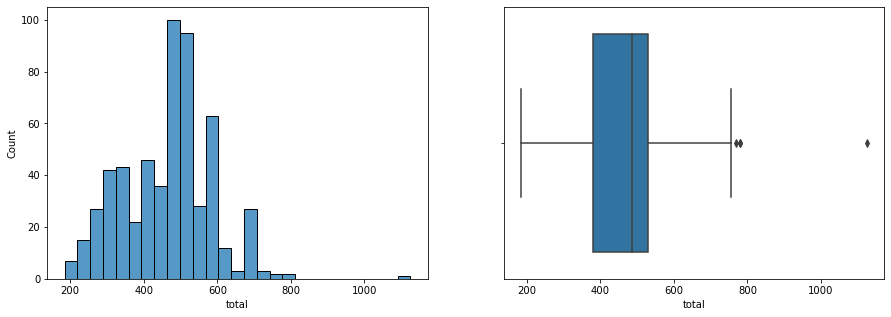

In [40]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='total', data=df, ax=axs[0])
sns.boxplot(x='total', data=df,ax=axs[1])

total in left skewed and has outliers

<AxesSubplot:xlabel='hp'>

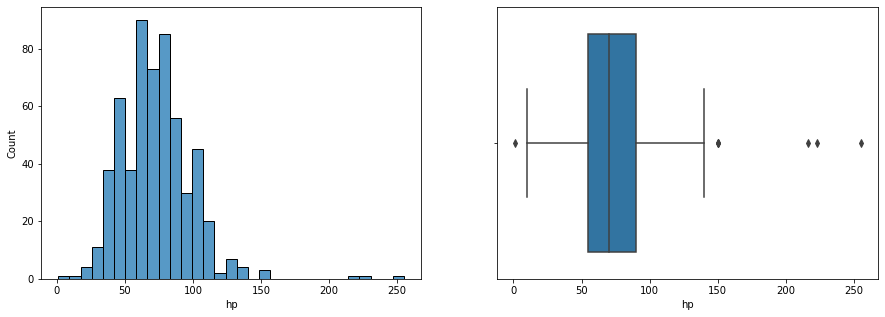

In [41]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='hp', data=df, ax=axs[0])
sns.boxplot(x='hp', data=df,ax=axs[1])

hp in right skewed and has outliers

<AxesSubplot:xlabel='attack'>

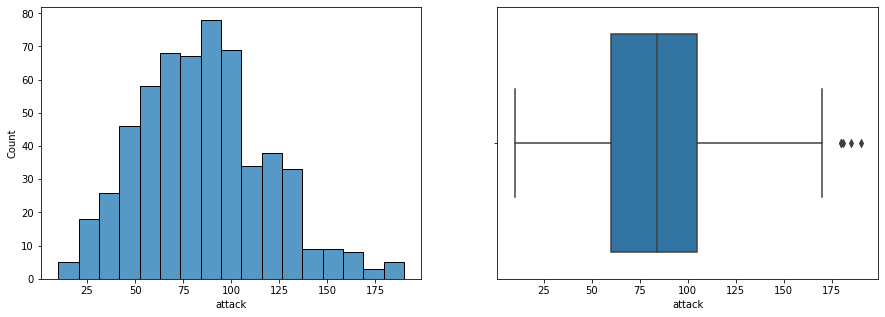

In [42]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='attack', data=df, ax=axs[0])
sns.boxplot(x='attack', data=df,ax=axs[1])

attack in left skewed and has outliers

<AxesSubplot:xlabel='defense'>

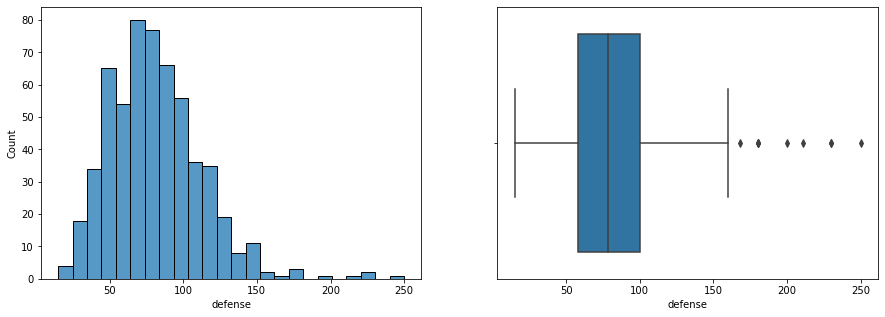

In [43]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='defense', data=df, ax=axs[0])
sns.boxplot(x='defense', data=df,ax=axs[1])

defense in right skewed and has outliers

<AxesSubplot:xlabel='sp_attack'>

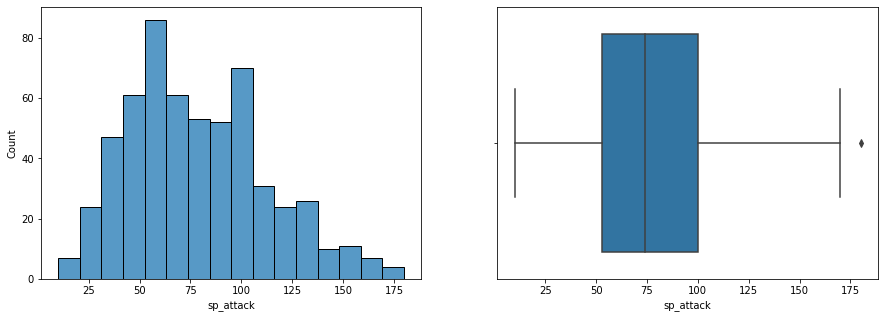

In [44]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='sp_attack', data=df, ax=axs[0])
sns.boxplot(x='sp_attack', data=df,ax=axs[1])

sp_attack in right skewed and has outliers

<AxesSubplot:xlabel='speed'>

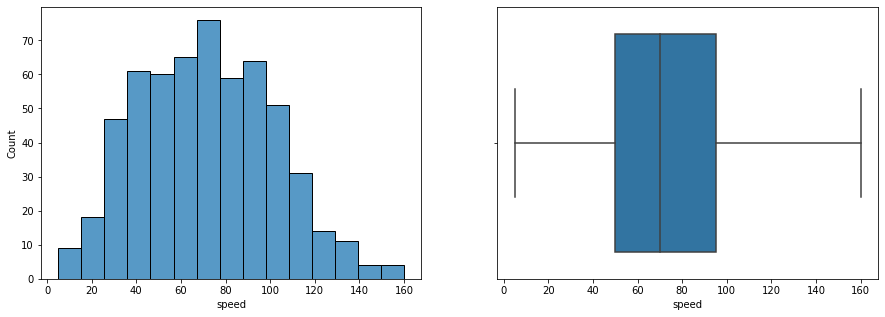

In [45]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='speed', data=df, ax=axs[0])
sns.boxplot(x='speed', data=df,ax=axs[1])

speed in left skewed and has no outliers

<AxesSubplot:xlabel='sp_defense'>

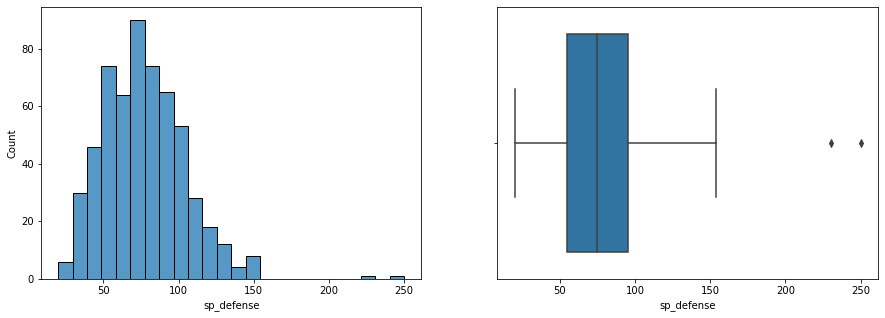

In [46]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='sp_defense', data=df, ax=axs[0])
sns.boxplot(x='sp_defense', data=df,ax=axs[1])

sp_defense in right skewed and has outliers

In [47]:
df_num = df.select_dtypes(exclude='object')
num_list = df_num.columns
num_list

Index(['type2', 'total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'generation', 'legendary'],
      dtype='object')

In [48]:
df_cat = df.select_dtypes(include='object')
cat_list = df_cat.columns
cat_list

Index(['name', 'type1'], dtype='object')

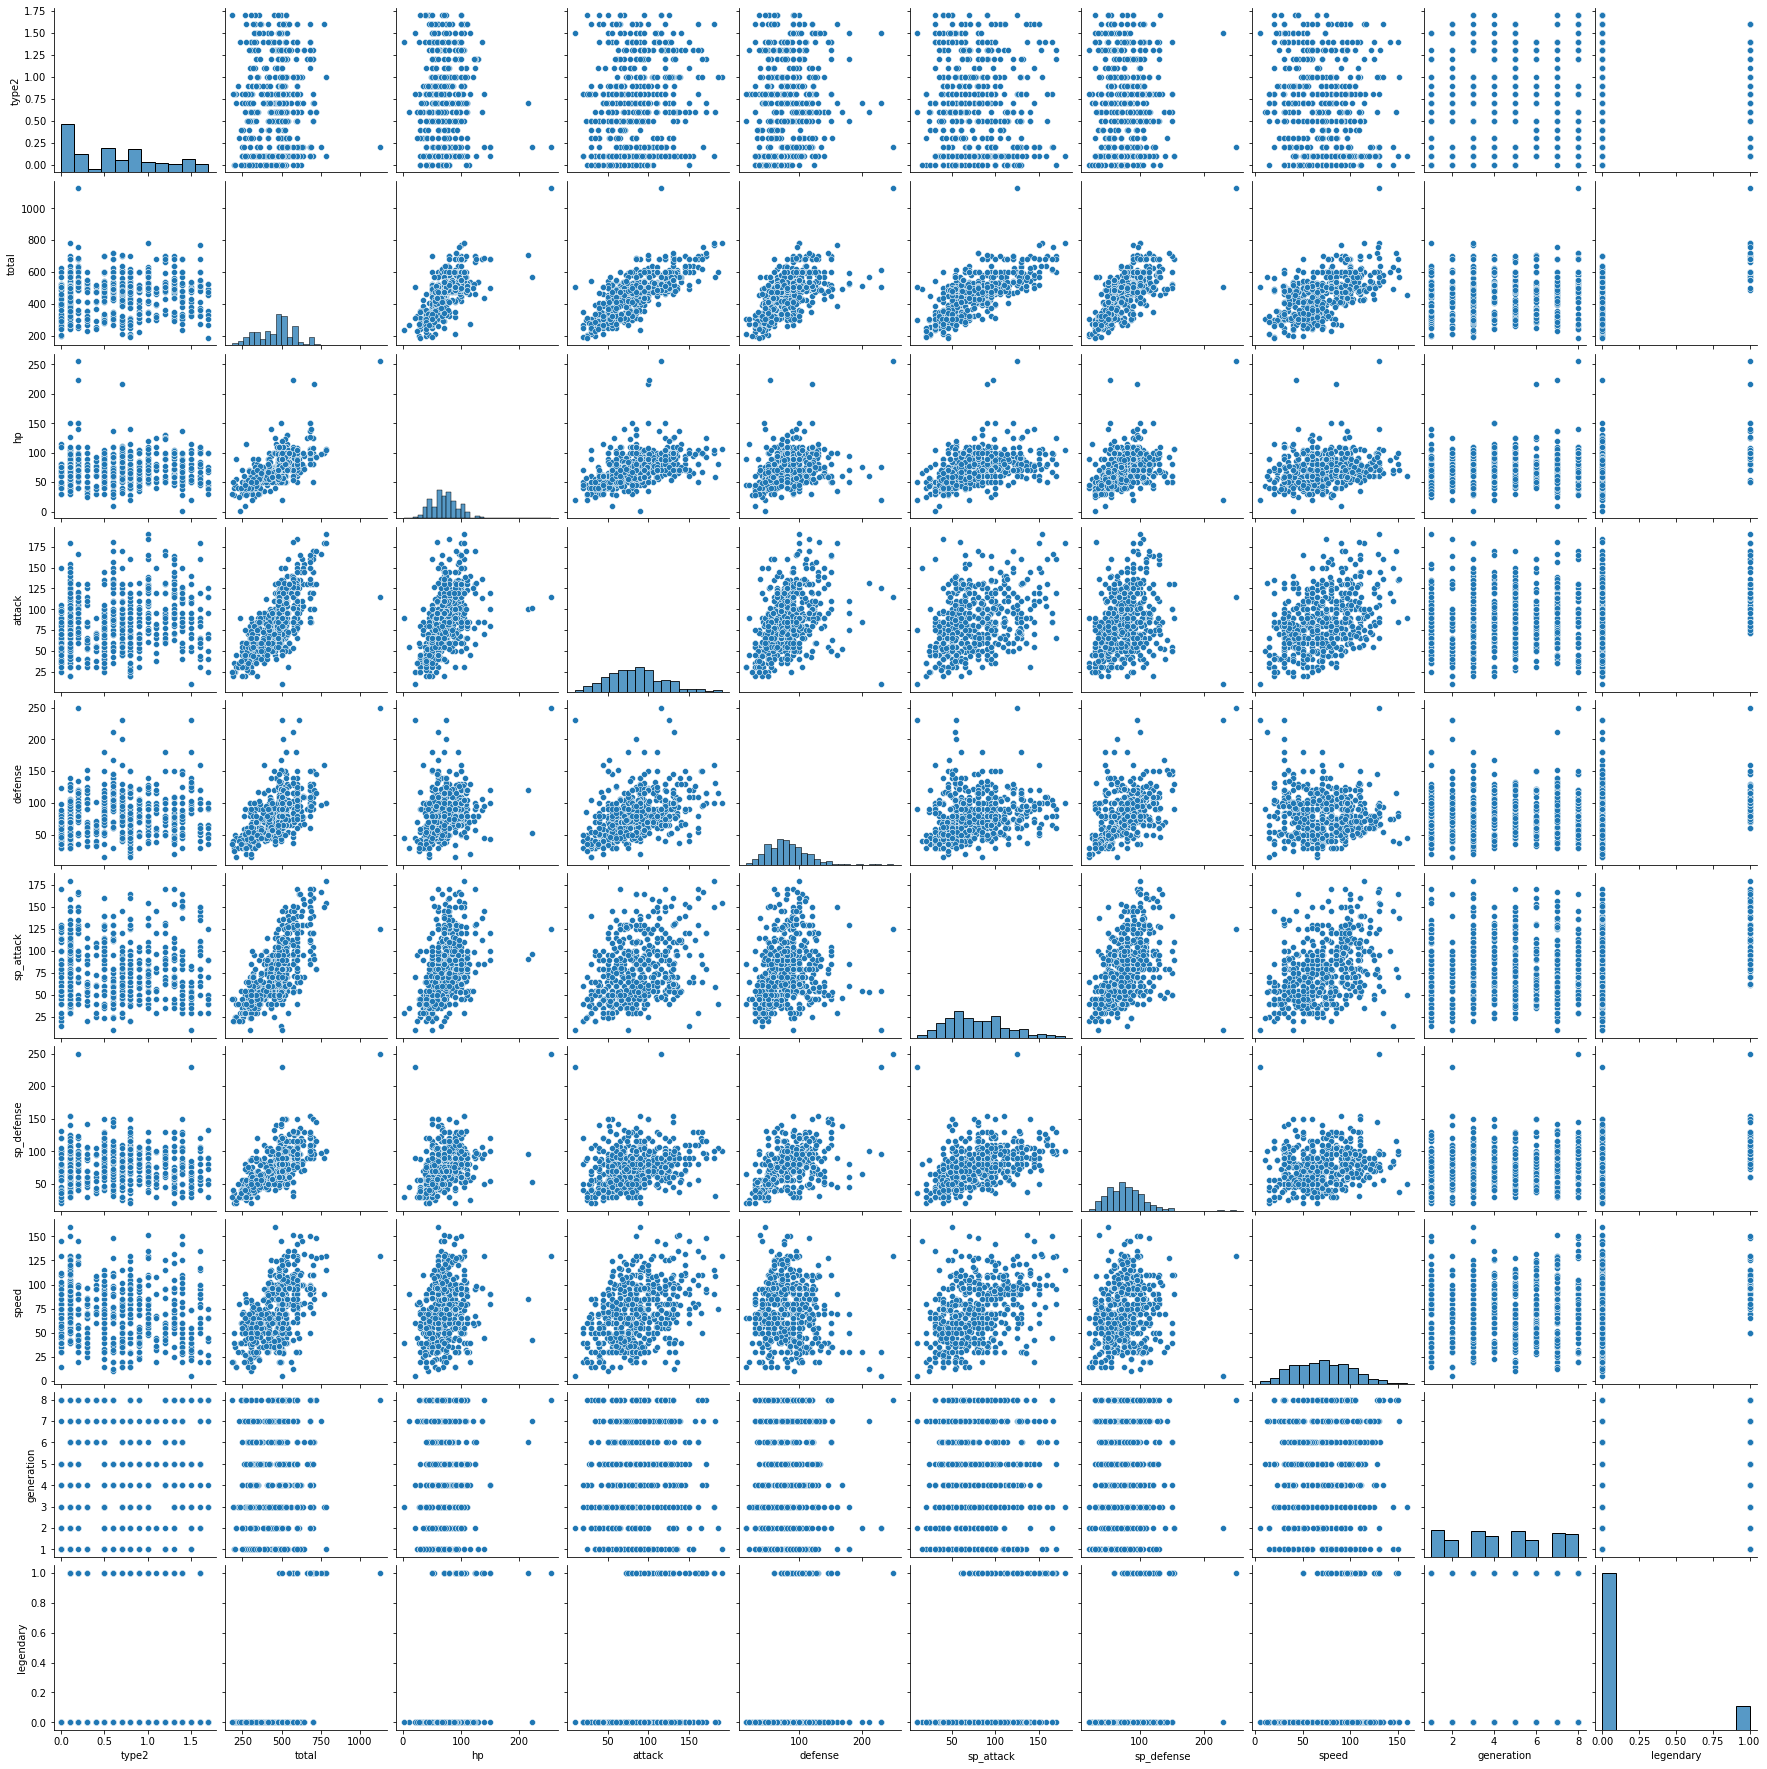

In [49]:
sns.pairplot(vars=num_list,data=df)

Observation:
There is a specific pattern observed between 'total' and 'attack'. As the 'attack' increases.
There is no specific relation observed between 'speed' and 'sp_attack', There is no specific relation observed between 'speed' and 'sp_defense' There is no specific relation observed between 'speed' and 'attack'.

In [50]:
corr = df.corr(method='pearson')
corr

,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
type2,1.000000,0.052288,0.038730,0.161343,0.155777,-0.037934,0.029754,-0.156920,0.221081,0.020442
total,0.052288,1.000000,0.688543,0.734508,0.608789,0.718163,0.697988,0.541696,0.111118,0.549787
hp,0.038730,0.688543,1.000000,0.486336,0.312177,0.419761,0.378630,0.234427,0.126200,0.402117
attack,0.161343,0.734508,0.486336,1.000000,0.411230,0.362865,0.237216,0.390237,0.107110,0.375643
defense,0.155777,0.608789,0.312177,0.411230,1.000000,0.176480,0.545095,-0.046236,0.074265,0.248405
sp_attack,-0.037934,0.718163,0.419761,0.362865,0.176480,1.000000,0.471223,0.403426,0.040609,0.428336
sp_defense,0.029754,0.697988,0.378630,0.237216,0.545095,0.471223,1.000000,0.188771,0.055697,0.377913
speed,-0.156920,0.541696,0.234427,0.390237,-0.046236,0.403426,0.188771,1.000000,0.044302,0.371156
generation,0.221081,0.111118,0.126200,0.107110,0.074265,0.040609,0.055697,0.044302,1.000000,0.159212
legendary,0.020442,0.549787,0.402117,0.375643,0.248405,0.428336,0.377913,0.371156,0.159212,1.000000


<AxesSubplot:>

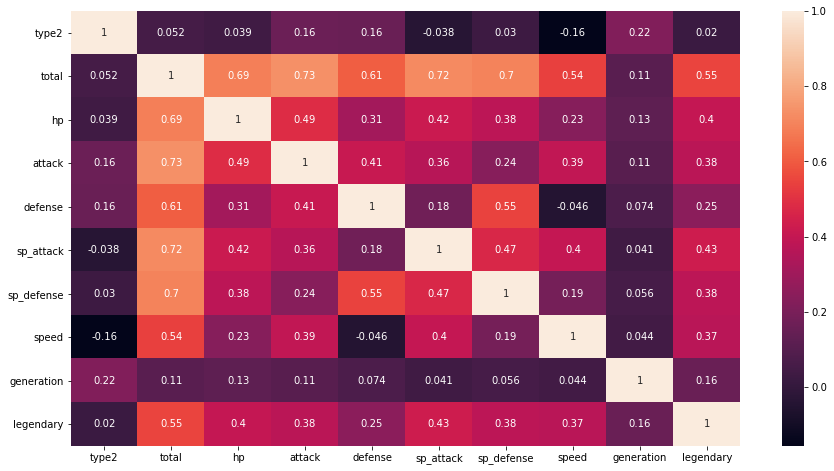

In [51]:
plt.subplots(figsize = (15,8))
sns.heatmap(corr, annot=True)

Observation
Correlation matrix gives us a similar representation as the pairplot.
We observe a positive correlation between 'total' and 'attack' and a negative correlation between 'type2' and 'speed'.

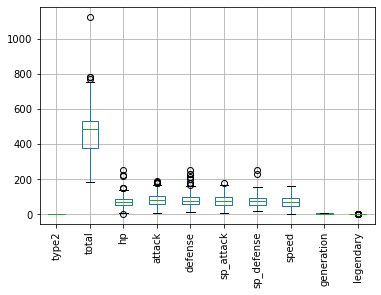

In [52]:
df[num_list].boxplot()
plt.xticks(rotation=90)
plt.show()

In [53]:
df1=df.iloc[:,1:13]

In [54]:
df.head()

,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,Bulbasaur,0.2,0.0,318,45,49,49,65,65,45,1,0.0
1,Ivysaur,0.2,0.0,405,60,62,63,80,80,60,1,0.0
2,Venusaur,0.2,0.0,525,80,82,83,100,100,80,1,0.0
3,Mega Venusaur,0.2,0.0,625,80,100,123,122,120,80,1,0.0
4,Gigantamax Venusaur,0.2,0.0,525,80,82,83,100,100,80,1,0.0


In [55]:
sclr=StandardScaler()

In [56]:
df_scaled=pd.DataFrame(sclr.fit_transform(df1),columns=df1.columns)

In [57]:
df_scaled.head()

,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,-1.128538,-1.291721,-1.210990,-1.073878,-1.093878,-0.984783,-0.399321,-0.414013,-0.894241,-1.493815,-0.387686
1,-1.128538,-1.291721,-0.493899,-0.491631,-0.699439,-0.552245,0.048705,0.119777,-0.385559,-1.493815,-0.387686
2,-1.128538,-1.291721,0.495191,0.284699,-0.092610,0.065667,0.646074,0.831498,0.292684,-1.493815,-0.387686
3,-1.128538,-1.291721,1.319433,0.284699,0.453536,1.301490,1.303179,1.543219,0.292684,-1.493815,-0.387686
4,-1.128538,-1.291721,0.495191,0.284699,-0.092610,0.065667,0.646074,0.831498,0.292684,-1.493815,-0.387686


In [58]:
df_scaled.describe()

,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
count,5.740000e+02,5.740000e+02,5.740000e+02,5.740000e+02,5.740000e+02,5.740000e+02,5.740000e+02,5.740000e+02,5.740000e+02,5.740000e+02,5.740000e+02
mean,-2.228183e-16,5.493090e-17,5.802559e-17,1.469982e-16,-1.175585e-17,-1.145582e-16,2.731071e-16,-2.584073e-16,1.841346e-16,-1.988344e-16,2.800702e-16
std,1.000872e+00,1.000872e+00,1.000872e+00,1.000872e+00,1.000872e+00,1.000872e+00,1.000872e+00,1.000872e+00,1.000872e+00,1.000872e+00,1.000872e+00
min,-1.516082e+00,-1.291721e+00,-2.307231e+00,-2.781804e+00,-2.277194e+00,-2.035232e+00,-2.042084e+00,-2.015386e+00,-2.250727e+00,-1.493815e+00,-3.876862e-01
25%,-7.409932e-01,-1.091654e+00,-6.999595e-01,-6.857131e-01,-7.601218e-01,-7.067228e-01,-7.577419e-01,-7.698738e-01,-7.246802e-01,-6.333534e-01,-3.876862e-01
50%,3.409581e-02,-9.131971e-02,1.654946e-01,-1.034656e-01,-3.192723e-02,-8.881132e-02,-1.305052e-01,-5.815281e-02,-4.643720e-02,-2.031228e-01,-3.876862e-01
75%,6.154125e-01,7.089477e-01,5.364035e-01,6.728644e-01,6.052430e-01,5.908913e-01,6.460735e-01,6.535682e-01,8.013666e-01,1.087569e+00,-3.876862e-01
max,2.165591e+00,2.109416e+00,5.440643e+00,7.077587e+00,3.184265e+00,5.225227e+00,3.035547e+00,6.169406e+00,3.005656e+00,1.517800e+00,2.579406e+00


In [59]:
link_method=linkage(df_scaled,method='ward')

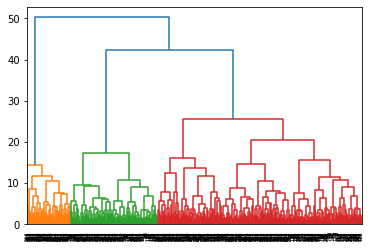

In [60]:
dend= dendrogram(link_method)

In [61]:
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster_values=cluster.fit_predict(df_scaled)
cluster_values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
df['Cluster']=cluster_values

In [63]:
df.head()

,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,Cluster
0,Bulbasaur,0.2,0.0,318,45,49,49,65,65,45,1,0.0,0
1,Ivysaur,0.2,0.0,405,60,62,63,80,80,60,1,0.0,0
2,Venusaur,0.2,0.0,525,80,82,83,100,100,80,1,0.0,0
3,Mega Venusaur,0.2,0.0,625,80,100,123,122,120,80,1,0.0,0
4,Gigantamax Venusaur,0.2,0.0,525,80,82,83,100,100,80,1,0.0,0


In [64]:
df.Cluster.value_counts()

0    499
1     75
Name: Cluster, dtype: int64

In [65]:
aggdata=df.groupby('Cluster').mean()
aggdata['Freq']=df.Cluster.value_counts().sort_index()
aggdata

,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,Freq
Cluster,,,,,,,,,,,
0,0.641683,439.062124,68.649299,80.252505,77.757515,72.809619,72.517034,67.126253,4.328657,0.0,499
1,0.672000,636.973333,99.386667,116.986667,101.613333,115.360000,104.026667,99.600000,5.426667,1.0,75


For the 0th cluster:-
These Pokemon have the lowest type2. They have the lowest total. They have the lowest hp. They have the lowest attack. They have the lowest defense. They have the lowest sp_attack. They have the lowest sp_defense. They have the lowest speed. They have the lowest generation. They have the second lowest legendary. They are the highest number of Pokemon.

For the 1st cluster:-
These Pokemon have the highest type2. They have the highest total. They have the  highest hp. They have the highest attack. They have the highest defense. They have the highest sp_attack. They have the highest sp_defense. They have the highest speed. They have the highest generation. They have the highest legendary. They are the lowest| number of Pokemon.

In [66]:
cluster=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
cluster_values=cluster.fit_predict(df_scaled)
cluster_values

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2,
       0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
df['Cluster']=cluster_values

In [68]:
df.head()

,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,Cluster
0,Bulbasaur,0.2,0.0,318,45,49,49,65,65,45,1,0.0,2
1,Ivysaur,0.2,0.0,405,60,62,63,80,80,60,1,0.0,0
2,Venusaur,0.2,0.0,525,80,82,83,100,100,80,1,0.0,0
3,Mega Venusaur,0.2,0.0,625,80,100,123,122,120,80,1,0.0,0
4,Gigantamax Venusaur,0.2,0.0,525,80,82,83,100,100,80,1,0.0,0


In [69]:
df.Cluster.value_counts()

0    351
2    148
1     75
Name: Cluster, dtype: int64

In [70]:
aggdata=df.groupby('Cluster').mean()
aggdata['Freq']=df.Cluster.value_counts().sort_index()
aggdata

,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,Freq
Cluster,,,,,,,,,,,
0,0.620513,494.059829,76.823362,91.119658,86.507123,83.051282,81.430199,75.19943,4.410256,0.0,351
1,0.672000,636.973333,99.386667,116.986667,101.613333,115.360000,104.026667,99.60000,5.426667,1.0,75
2,0.691892,308.628378,49.263514,54.479730,57.006757,48.520270,51.378378,47.97973,4.135135,0.0,148


For the 0th cluster:-
These Pokemon have the lowest type2. They have the second highest total. They have the second highest hp. They have the second highest attack. They have the second highest defense. They have the second highest sp_attack. They have the second highest sp_defense. They have the second highest speed. They have the second highest generation. They are the highest number of Pokemon.

For the 1st cluster:-
These Pokemon have the second highest type2. They have the highest total. They have the highest hp. They have the highest attack. They have the highest defense. They have the highest sp_attack. They have the highest sp_defense. They have the highest speed. They have the highest generation. They are the second lowest number of Pokemon.

For the 2nd cluster:-
These Pokemon have the second highest type2. They have the lowest total. They have the lowest hp. They have the lowest attack. They have the lowest defense. They have the lowest sp_attack. They have the lowest sp_defense. They have the lowest speed. They have the lowest generation. They are the second highest number of Pokemon.

In [71]:
df_scaled

,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,-1.128538,-1.291721,-1.210990,-1.073878,-1.093878,-0.984783,-0.399321,-0.414013,-0.894241,-1.493815,-0.387686
1,-1.128538,-1.291721,-0.493899,-0.491631,-0.699439,-0.552245,0.048705,0.119777,-0.385559,-1.493815,-0.387686
2,-1.128538,-1.291721,0.495191,0.284699,-0.092610,0.065667,0.646074,0.831498,0.292684,-1.493815,-0.387686
3,-1.128538,-1.291721,1.319433,0.284699,0.453536,1.301490,1.303179,1.543219,0.292684,-1.493815,-0.387686
4,-1.128538,-1.291721,0.495191,0.284699,-0.092610,0.065667,0.646074,0.831498,0.292684,-1.493815,-0.387686
...,...,...,...,...,...,...,...,...,...,...,...
569,-0.547221,0.508881,1.113373,1.255112,1.060365,0.745369,-0.249979,0.653568,1.140488,1.517800,2.579406
570,-0.547221,0.508881,1.113373,1.255112,1.060365,0.745369,-0.249979,0.653568,1.140488,1.517800,2.579406
571,0.809185,0.508881,0.289131,1.061029,-0.153293,-0.027020,0.048705,0.119777,0.292684,1.517800,2.579406
572,0.809185,1.109081,1.772766,1.061029,2.425729,2.135670,0.198047,1.899080,-0.724680,1.517800,2.579406


In [72]:
k_means =KMeans(n_clusters=2,random_state=2)
k_means.fit(df_scaled)
k_means.inertia_

4845.691994448885

In [73]:
k_means =KMeans(n_clusters=3,random_state=2)
k_means.fit(df_scaled)
k_means.inertia_

4060.8438979119555

In [74]:
k_means =KMeans(n_clusters=4,random_state=2)
k_means.fit(df_scaled)
k_means.inertia_

3697.9921989698264

In [75]:
k_means =KMeans(n_clusters=5,random_state=2)
k_means.fit(df_scaled)
k_means.inertia_

3482.796032982047

In [76]:
wss=[]

In [77]:
for i in range(1,10):
    KM=KMeans(n_clusters=i,random_state=2)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [78]:
wss

[6313.999999999996,
 4845.691994448885,
 4060.8438979119555,
 3697.9921989698264,
 3482.796032982047,
 3330.1717134712635,
 3177.599729569469,
 3081.056660531054,
 2979.377945535135]

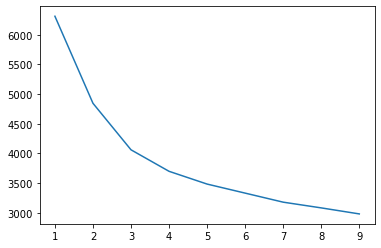

In [79]:
plt.plot(range(1,10),wss)

In [80]:
k_means = KMeans(n_clusters=3,random_state=2)
k_means.fit(df_scaled)
labels_3=k_means.labels_

In [81]:
df['Clus_kmeans_3']=labels_3
df.head()

,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,Cluster,Clus_kmeans_3
0,Bulbasaur,0.2,0.0,318,45,49,49,65,65,45,1,0.0,2,1
1,Ivysaur,0.2,0.0,405,60,62,63,80,80,60,1,0.0,0,1
2,Venusaur,0.2,0.0,525,80,82,83,100,100,80,1,0.0,0,2
3,Mega Venusaur,0.2,0.0,625,80,100,123,122,120,80,1,0.0,0,2
4,Gigantamax Venusaur,0.2,0.0,525,80,82,83,100,100,80,1,0.0,0,2


In [82]:
df.Clus_kmeans_3.value_counts().sort_index()

0     78
1    180
2    316
Name: Clus_kmeans_3, dtype: int64

In [83]:
clist_profile =df.iloc[:,2:14]
clist_profile=clist_profile.groupby('Clus_kmeans_3').mean()
clist_profile['Freq']=df.Clus_kmeans_3.value_counts().sort_index()
clist_profile

,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,Cluster,Freq
Clus_kmeans_3,,,,,,,,,,,,
0,0.662821,639.397436,99.192308,118.384615,102.769231,115.346154,103.807692,99.897436,5.346154,0.961538,0.961538,78
1,0.585000,321.961111,51.505556,56.833333,56.394444,51.761111,53.038889,52.566667,3.861111,0.000000,1.577778,180
2,0.675949,503.287975,78.170886,92.898734,89.414557,84.398734,83.367089,75.037975,4.604430,0.000000,0.037975,316


For the 0th cluster:-
These Pokemon have the second highest type2. They have the highest total. They have the highest hp. They have the highest attack. They have the highest defense. They have the highest sp_attack. They have the highest sp_defense. They have the highest speed. They have the highest generation. They have the second highest Cluster. They are the lowest number of Pokemon.

For the 1st cluster:-
These Pokemon have the lowest type2. They have the lowest total. They have the lowest hp. They have the lowest attack. They have the lowest defense. They have the lowest sp_attack. They have the lowest sp_defense. They have the lowest speed. They have the lowest generation. They have the highest Cluster. They are the second highest number of Pokemon.

For the 2nd cluster:-
These Pokemon have the highest type2. They have the second highest total. They have the second highest hp. They have the second highest attack. They have the second highest defense. They have the second highest sp_attack. They have the second highest sp_defense. They have the second highest speed. They have the second highest generation. They have the lowest Cluster. They are the highest number of Pokemon.